In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import datetime as dt
import matplotlib.pyplot as plt

# Cleaning for Machine Learning

While we have cleaned our data earlier, we have added new columns and group some our data. Thus, we need to remove unnecessary columns. We also need to change all non-numerical columns (i.e. columns with `object` and `bool` type) to a numerical type so that it will be easier when doing classification later on

In [2]:
# let us first make a copy of our dataframe
cal_accident_df = pd.read_csv('csv/clean_data2.csv')
cal_accident_df['Start_Time'] = pd.to_datetime(cal_accident_df['Start_Time'], format = 'mixed')
ml_df = cal_accident_df.copy()
ml_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Severity           30000 non-null  int64         
 1   Start_Time         30000 non-null  datetime64[ns]
 2   Start_Lat          30000 non-null  float64       
 3   Start_Lng          30000 non-null  float64       
 4   Street             30000 non-null  object        
 5   City               30000 non-null  object        
 6   County             30000 non-null  object        
 7   Zipcode            30000 non-null  int64         
 8   Humidity(%)        30000 non-null  float64       
 9   Wind_Direction     30000 non-null  float64       
 10  Weather_Condition  30000 non-null  object        
 11  Amenity            30000 non-null  bool          
 12  Bump               30000 non-null  bool          
 13  Crossing           30000 non-null  bool          
 14  Give_W

The `Start_Time` column can be further broken down into its individual component like `Month` and `Hour`. This will make it easier when doing machine learning later on

In [6]:
ml_df['Year'] = cal_accident_df['Start_Time'].dt.year
ml_df['Month'] = cal_accident_df['Start_Time'].dt.month
ml_df['Day'] = cal_accident_df['Start_Time'].dt.day
ml_df['Day_Week'] = cal_accident_df['Start_Time'].dt.weekday

ml_df['Hour'] = cal_accident_df['Start_Time'].dt.hour
ml_df['Minute'] = cal_accident_df['Start_Time'].dt.minute

Now, we remove unnecessary columns

In [7]:
# remove columns
remove_cols = ['Start_Time', 'Street', 'Sunrise_Sunset', 'Weather_Condition']
ml_df = ml_df.drop(columns=remove_cols)

Let us take a look at our updated dataframe

In [8]:
ml_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 39 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Severity         30000 non-null  int64  
 1   Start_Lat        30000 non-null  float64
 2   Start_Lng        30000 non-null  float64
 3   City             30000 non-null  object 
 4   County           30000 non-null  object 
 5   Zipcode          30000 non-null  int64  
 6   Humidity(%)      30000 non-null  float64
 7   Wind_Direction   30000 non-null  float64
 8   Amenity          30000 non-null  bool   
 9   Bump             30000 non-null  bool   
 10  Crossing         30000 non-null  bool   
 11  Give_Way         30000 non-null  bool   
 12  Junction         30000 non-null  bool   
 13  No_Exit          30000 non-null  bool   
 14  Railway          30000 non-null  bool   
 15  Station          30000 non-null  bool   
 16  Stop             30000 non-null  bool   
 17  Traffic_Calm

Now, let us convert all the column with `object` type into numerical type using `sklearn LabelEncoder`  
https://scikit-learn.org/dev/modules/generated/sklearn.preprocessing.LabelEncoder.html   
https://stackoverflow.com/questions/44474570/sklearn-label-encoding-multiple-columns-pandas-dataframe

In [9]:
# get column of object type
object_col = ml_df.select_dtypes(object).columns
print(object_col)

Index(['City', 'County', 'Weather', 'Road_Type', 'Season'], dtype='object')


In [10]:
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in object_col:
    ml_df[col] = le.fit_transform(ml_df[col].astype(str))

In [11]:
bool_col = ml_df.select_dtypes(bool).columns
for col in bool_col:
    ml_df[col] = ml_df[col].astype(int)

In [12]:
ml_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 39 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Severity         30000 non-null  int64  
 1   Start_Lat        30000 non-null  float64
 2   Start_Lng        30000 non-null  float64
 3   City             30000 non-null  int32  
 4   County           30000 non-null  int32  
 5   Zipcode          30000 non-null  int64  
 6   Humidity(%)      30000 non-null  float64
 7   Wind_Direction   30000 non-null  float64
 8   Amenity          30000 non-null  int32  
 9   Bump             30000 non-null  int32  
 10  Crossing         30000 non-null  int32  
 11  Give_Way         30000 non-null  int32  
 12  Junction         30000 non-null  int32  
 13  No_Exit          30000 non-null  int32  
 14  Railway          30000 non-null  int32  
 15  Station          30000 non-null  int32  
 16  Stop             30000 non-null  int32  
 17  Traffic_Calm

---
# Resampling

As seen from our above analysis, `Severity = 2` is causing an imbalanced data with more than 95 % of our data being `Severity = 2`. This would cause a high accuracy from all our classification method later on as it will be skewed towards `Severity = 2`.

Hence, we need to use resampling in order to even out the ratio between the different `Severity`

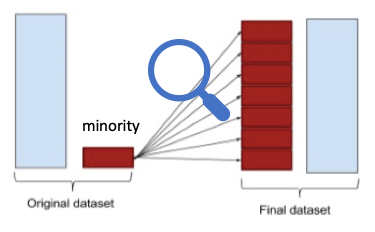

In [13]:
from sklearn.model_selection import train_test_split

predictors = [ele for ele in ml_df.columns if ele != 'Severity']
# print(predictors)

y = pd.DataFrame(ml_df['Severity'])
X = pd.DataFrame(ml_df[predictors])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

In [14]:
print(y_train.value_counts().sort_index())

Severity
1             126
2           23507
3             178
4             189
Name: count, dtype: int64


In [46]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24000 entries, 11401 to 15715
Data columns (total 38 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Start_Lat        24000 non-null  float64
 1   Start_Lng        24000 non-null  float64
 2   City             24000 non-null  int32  
 3   County           24000 non-null  int32  
 4   Zipcode          24000 non-null  int64  
 5   Humidity(%)      24000 non-null  float64
 6   Wind_Direction   24000 non-null  float64
 7   Amenity          24000 non-null  int32  
 8   Bump             24000 non-null  int32  
 9   Crossing         24000 non-null  int32  
 10  Give_Way         24000 non-null  int32  
 11  Junction         24000 non-null  int32  
 12  No_Exit          24000 non-null  int32  
 13  Railway          24000 non-null  int32  
 14  Station          24000 non-null  int32  
 15  Stop             24000 non-null  int32  
 16  Traffic_Calming  24000 non-null  int32  
 17  Traffic_Signa

In [45]:
y_train

,Severity
11401,2
18002,2
6636,2
6431,2
28067,2
...,...
23452,2
23775,2
4367,2
27098,2


Above, we can see the imbalance in the data, hence requiring resampling

## Resampling using SMOTE

In [15]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=20)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [16]:
X_res.shape

(94028, 38)

In [17]:
y_res.value_counts()

Severity
1           23507
2           23507
3           23507
4           23507
Name: count, dtype: int64

In [18]:
X_res.head()

,Start_Lat,Start_Lng,City,County,Zipcode,Humidity(%),Wind_Direction,Amenity,Bump,Crossing,...,Is_Rush_Hour,Is_Christmas,Is_Weekday,Season,Year,Month,Day,Day_Week,Hour,Minute
0,38.416346,-119.450000,169,25,96100,45.0,202.5,0,0,0,...,0,0,1,3,2021,1,4,0,21,35
1,33.888637,-118.207097,176,18,90200,39.0,-1.0,0,0,0,...,0,0,1,1,2023,3,27,0,21,41
2,37.651650,-122.098680,333,0,94500,71.0,-1.0,0,0,0,...,1,0,1,1,2020,3,9,0,9,15
3,33.859729,-118.307619,296,18,90200,81.0,247.5,0,0,0,...,1,0,1,2,2022,7,20,2,7,41
4,34.053143,-118.963125,469,55,90300,83.0,45.0,0,0,0,...,1,0,1,3,2021,1,22,4,6,4


In [19]:
# save resampled data to csv 
sm_df = pd.concat([y_res, X_res], axis=1)
sm_df.info()
# sm_df.to_csv('data_resampled_SMOTE.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94028 entries, 0 to 94027
Data columns (total 39 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Severity         94028 non-null  int64  
 1   Start_Lat        94028 non-null  float64
 2   Start_Lng        94028 non-null  float64
 3   City             94028 non-null  int32  
 4   County           94028 non-null  int32  
 5   Zipcode          94028 non-null  int64  
 6   Humidity(%)      94028 non-null  float64
 7   Wind_Direction   94028 non-null  float64
 8   Amenity          94028 non-null  int32  
 9   Bump             94028 non-null  int32  
 10  Crossing         94028 non-null  int32  
 11  Give_Way         94028 non-null  int32  
 12  Junction         94028 non-null  int32  
 13  No_Exit          94028 non-null  int32  
 14  Railway          94028 non-null  int32  
 15  Station          94028 non-null  int32  
 16  Stop             94028 non-null  int32  
 17  Traffic_Calm

## Resampling using SMOTEENN

In [20]:
from imblearn.combine import SMOTEENN

sme = SMOTEENN(random_state=20)
X_res, y_res = sme.fit_resample(X_train, y_train)

In [21]:
X_res.shape

(89720, 38)

In [22]:
y_res.value_counts().sort_index()

Severity
1           23476
2           19501
3           23405
4           23338
Name: count, dtype: int64

In [23]:
# save resampled data to csv 
sme_df = pd.concat([y_res, X_res], axis=1)
sme_df.info()
# sme_df.to_csv('data_resampled_SMOTEENN.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89720 entries, 0 to 89719
Data columns (total 39 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Severity         89720 non-null  int64  
 1   Start_Lat        89720 non-null  float64
 2   Start_Lng        89720 non-null  float64
 3   City             89720 non-null  int32  
 4   County           89720 non-null  int32  
 5   Zipcode          89720 non-null  int64  
 6   Humidity(%)      89720 non-null  float64
 7   Wind_Direction   89720 non-null  float64
 8   Amenity          89720 non-null  int32  
 9   Bump             89720 non-null  int32  
 10  Crossing         89720 non-null  int32  
 11  Give_Way         89720 non-null  int32  
 12  Junction         89720 non-null  int32  
 13  No_Exit          89720 non-null  int32  
 14  Railway          89720 non-null  int32  
 15  Station          89720 non-null  int32  
 16  Stop             89720 non-null  int32  
 17  Traffic_Calm

## Resampling using SMOTETomek

In [24]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state=20)
X_res, y_res = smt.fit_resample(X_train, y_train)

In [25]:
X_res.shape

(94012, 38)

In [26]:
y_res.value_counts().sort_index()

Severity
1           23506
2           23499
3           23504
4           23503
Name: count, dtype: int64

In [27]:
# save resampled data to csv 
smt_df = pd.concat([y_res, X_res], axis=1)
smt_df.info()
# smt_df.to_csv('data_resampled_SMOTETomek.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94012 entries, 0 to 94011
Data columns (total 39 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Severity         94012 non-null  int64  
 1   Start_Lat        94012 non-null  float64
 2   Start_Lng        94012 non-null  float64
 3   City             94012 non-null  int32  
 4   County           94012 non-null  int32  
 5   Zipcode          94012 non-null  int64  
 6   Humidity(%)      94012 non-null  float64
 7   Wind_Direction   94012 non-null  float64
 8   Amenity          94012 non-null  int32  
 9   Bump             94012 non-null  int32  
 10  Crossing         94012 non-null  int32  
 11  Give_Way         94012 non-null  int32  
 12  Junction         94012 non-null  int32  
 13  No_Exit          94012 non-null  int32  
 14  Railway          94012 non-null  int32  
 15  Station          94012 non-null  int32  
 16  Stop             94012 non-null  int32  
 17  Traffic_Calm

## Save test data

In [28]:
test_df = pd.concat([y_test, X_test], axis=1)
test_df.info()
# test_df.to_csv('test.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
Index: 6000 entries, 4455 to 5400
Data columns (total 39 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Severity         6000 non-null   int64  
 1   Start_Lat        6000 non-null   float64
 2   Start_Lng        6000 non-null   float64
 3   City             6000 non-null   int32  
 4   County           6000 non-null   int32  
 5   Zipcode          6000 non-null   int64  
 6   Humidity(%)      6000 non-null   float64
 7   Wind_Direction   6000 non-null   float64
 8   Amenity          6000 non-null   int32  
 9   Bump             6000 non-null   int32  
 10  Crossing         6000 non-null   int32  
 11  Give_Way         6000 non-null   int32  
 12  Junction         6000 non-null   int32  
 13  No_Exit          6000 non-null   int32  
 14  Railway          6000 non-null   int32  
 15  Station          6000 non-null   int32  
 16  Stop             6000 non-null   int32  
 17  Traffic_Calming 

Let's visualise the ratio of the different sampling results

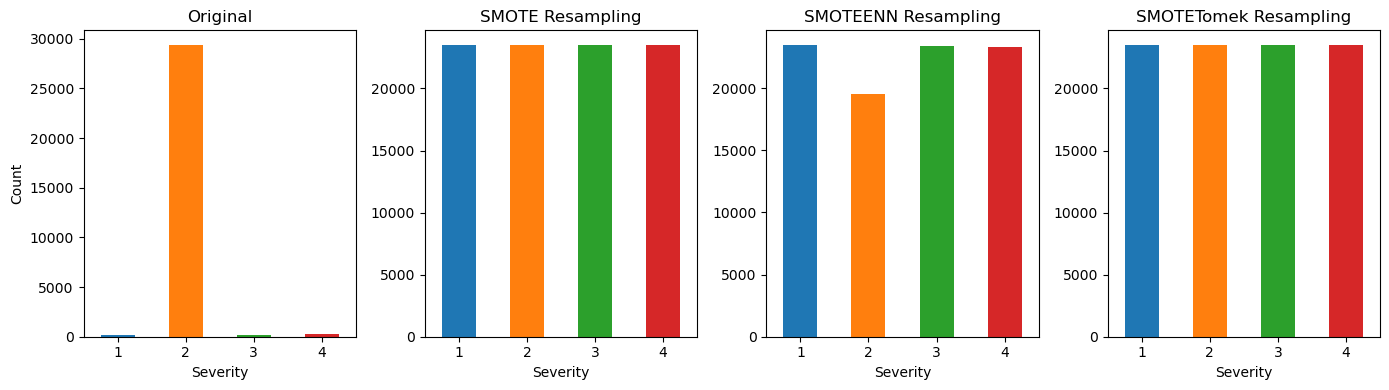

In [43]:
f, axes = plt.subplots(1, 4, figsize=(14, 4))

blue = '#1f77b4'
orange = '#ff7f0e'
green = '#2ca02c'
red = '#d62728'
colors = [blue, orange, green, red]

ml_df['Severity'].value_counts().sort_index().plot(kind='bar', rot=0, color=colors, ax=axes[0], ylabel='Count', title='Original')
sm_df['Severity'].value_counts().sort_index().plot(kind='bar', rot=0, color=colors, ax=axes[1], title='SMOTE Resampling')
sme_df['Severity'].value_counts().sort_index().plot(kind='bar', rot=0, color=colors, ax=axes[2], title='SMOTEENN Resampling')
smt_df['Severity'].value_counts().sort_index().plot(kind='bar', rot=0, color=colors, ax=axes[3], title='SMOTETomek Resampling')

plt.tight_layout()